In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_ta

In [2]:


df=pd.read_csv('TCS.NS.csv')


df[df['Open'].isnull()==True]


df=df.dropna()



In [4]:
df.columns



Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
def cleansort(data):
   
    data['Date']=pd.to_datetime(data['Date'])
    data=data.sort_values(by='Date')
    data.set_index(pd.DatetimeIndex(data['Date']), inplace=True)
    try:
        data=data.drop(['Date'],axis=1)
    except:
        pass
    
    
    return data

In [26]:
def tech_indicators(data):
    data.ta.rsi(close='Close', length=10, append=True)
    data.ta.ema(close='Close', length=10, append=True)
    data=data[10:]
    #data.ta.cdl_pattern(name="all",append=True)
    #data.ta.strategy("momentum")
    return data

In [34]:
def datashift(data):
    
    col=data.columns
    
    ### ltp== last traded price
    ### vwap= volume weighted average price
    data=data.reset_index(drop=True)
    for j in col:
        x=[]
        for i in range(len(data)):
            if (i==0):
                x.append(0)
            else:
                x.append(data[j][i-1])
        nam='prev_'+j
        data[nam]=x
    data['openingprice_diff']=data['Open']-data['prev_Open']
    data['prev_h_l_diff']=data['prev_High']-data['prev_Low']
    data['open_close_diff']=data['prev_Open']-data['prev_Close']
    col= [e for e in col if e not in ('Close')]
    data=data.drop(col,axis=1)
    data=data[1:]
    data=data.reset_index(drop=True)
    #data=data.drop(['PREV. CLOSE '],axis=1)
    return data

In [35]:
def buysell(data):
    act=[]
    for i in range(len(data)):
        
        if (data['Close'][i] > data['prev_Close'][i]):
            act.append(1)
        else:
            act.append(0)

    data['action']=act
    data=data.drop('Close',axis=1)
    return data

In [36]:

def xy(data):
    X=data.drop('Close',axis=1)
    y=data['Close']
    return X,y

In [37]:
a=cleansort(df.copy())
b=tech_indicators(a)
c=datashift(b)

X,y=xy(c)

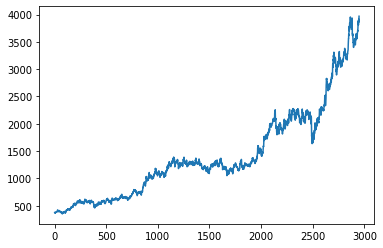

In [38]:
plt.plot(range(len(y)),y)

In [39]:
X

,prev_Open,prev_High,prev_Low,prev_Close,prev_Adj Close,prev_Volume,prev_RSI_10,prev_EMA_10,openingprice_diff,prev_h_l_diff,open_close_diff
0,377.500000,381.325012,367.500000,369.200012,295.245087,4739188.0,11.887707,378.625460,-5.500000,13.825012,8.299988
1,372.000000,378.450012,367.750000,376.475006,301.062927,2977676.0,26.151534,378.234468,4.475006,10.700012,-4.475006
2,376.475006,376.950012,366.250000,369.350006,295.365082,2716612.0,22.234659,376.619112,-8.975006,10.700012,7.125000
3,367.500000,367.500000,358.299988,361.750000,289.287445,4607118.0,18.882736,373.915637,-3.000000,9.200012,5.750000
4,364.500000,367.375000,354.075012,362.075012,289.547363,4170344.0,19.459662,371.762796,-2.000000,13.299988,2.424988
...,...,...,...,...,...,...,...,...,...,...,...
2945,3820.000000,3864.899902,3796.399902,3853.500000,3853.500000,2460591.0,69.600548,3784.874954,158.000000,68.500000,-33.500000
2946,3978.000000,3978.000000,3861.000000,3879.850098,3879.850098,3937092.0,71.904525,3802.143162,-122.000000,117.000000,98.149902
2947,3856.000000,3925.000000,3856.000000,3915.899902,3915.899902,1906106.0,74.807012,3822.826206,69.000000,69.000000,-59.899902
2948,3925.000000,3929.000000,3836.550049,3859.899902,3859.899902,3203744.0,63.486682,3829.566878,-7.000000,92.449951,65.100098


In [32]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [68]:
dataset=y.values


In [69]:
len(y)

2950

In [210]:
from sklearn.preprocessing import MinMaxScaler

In [211]:
sc = MinMaxScaler(feature_range = (0, 1))
scaled_data= sc.fit_transform(np.reshape(dataset,(len(dataset),1)))

In [212]:
scaled_data

array([[0.00737901],
       [0.00540989],
       [0.0033095 ],
       ...,
       [0.97008325],
       [0.98058521],
       [1.        ]])

In [213]:
# Feature Scaling
day=20

# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(day,2500):
    X_train.append(scaled_data[i-day:i, 0])
    y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [214]:
X_train

array([[[0.00737901],
        [0.00540989],
        [0.0033095 ],
        ...,
        [0.00879539],
        [0.00956231],
        [0.00889212]],

       [[0.00540989],
        [0.0033095 ],
        [0.00339932],
        ...,
        [0.00956231],
        [0.00889212],
        [0.00871247]],

       [[0.0033095 ],
        [0.00339932],
        [0.00491934],
        ...,
        [0.00889212],
        [0.00871247],
        [0.0087263 ]],

       ...,

       [[0.49940238],
        [0.48794698],
        [0.4992227 ],
        ...,
        [0.36055552],
        [0.35556707],
        [0.40008982]],

       [[0.48794698],
        [0.4992227 ],
        [0.49022701],
        ...,
        [0.35556707],
        [0.40008982],
        [0.36478391]],

       [[0.4992227 ],
        [0.49022701],
        [0.48522474],
        ...,
        [0.40008982],
        [0.36478391],
        [0.37402841]]])

In [185]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 25, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 10))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 64)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
39/39 [==============================] - 10s 41ms/step - loss: 0.0119
Epoch 2/100
39/39 [==============================] - 2s 41ms/step - loss: 0.0039
Epoch 3/100
39/39 [==============================] - 1s 39ms/step - loss: 0.0027
Epoch 4/100
39/39 [==============================] - 2s 39ms/step - loss: 0.0024
Epoch 5/100
39/39 [==============================] - 

In [196]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 20, 50)            10400     
                                                                 
 dropout_28 (Dropout)        (None, 20, 50)            0         
                                                                 
 lstm_29 (LSTM)              (None, 20, 50)            20200     
                                                                 
 dropout_29 (Dropout)        (None, 20, 50)            0         
                                                                 
 lstm_30 (LSTM)              (None, 20, 25)            7600      
                                                                 
 dropout_30 (Dropout)        (None, 20, 25)            0         
                                                                 
 lstm_31 (LSTM)              (None, 10)               

In [215]:
test_data=scaled_data[(2500-10):,:]

In [216]:
test_data.shape

(460, 1)

In [225]:
X_test=[]
y_test=dataset[2500:]
for i in range(day,len(test_data)):
    X_test.append(test_data[i-day:i, 0])

In [226]:
X_test = np.array(X_test)
X_test= np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [227]:
X_test.shape

(440, 20, 1)

In [190]:
predictions=model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [191]:
predictions=sc.inverse_transform(predictions)

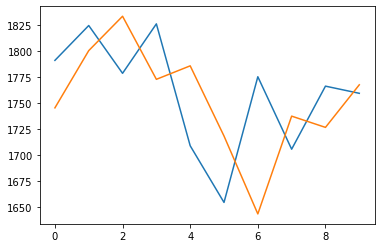

In [99]:
plt.plot(y_test[:10],'b')
plt.plot(predictions[:10],'o')  ### 1 st model with min max scaling in range of 0-10

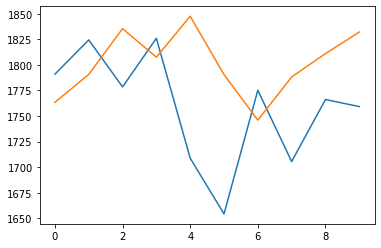

In [111]:
plt.plot(y_test[:10])
plt.plot(predictions[:10])   # 2 nd modle with range 0-100 

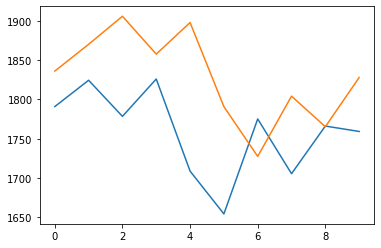

In [126]:
plt.plot(y_test[:10]) # min max scaling 0-5
plt.plot(predictions[:10])

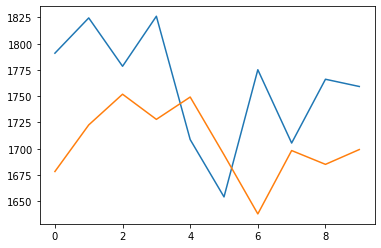

In [139]:
plt.plot(y_test[:10])  # min max scaling 0-1
plt.plot(predictions[:10])

## min max scalong 0-5  give good results

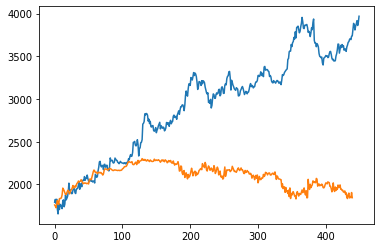

In [150]:
plt.plot(y_test)
plt.plot(predictions) 

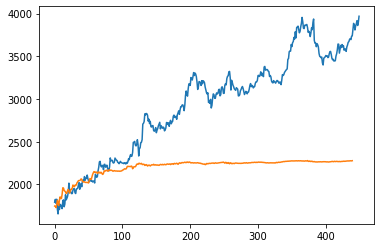

In [165]:
plt.plot(y_test)
plt.plot(predictions) 

## 32 batch size and custom model


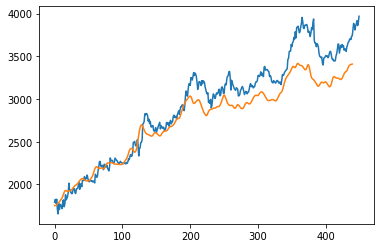

In [178]:
plt.plot(y_test)
plt.plot(predictions) 

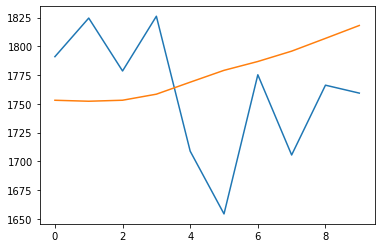

In [179]:
plt.plot(y_test[:10])
plt.plot(predictions[:10])

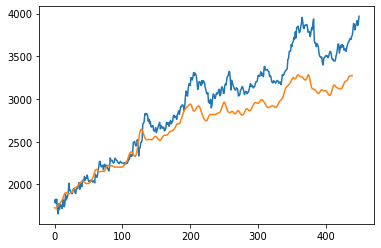

In [192]:
plt.plot(y_test)           ## batch---64
plt.plot(predictions) 

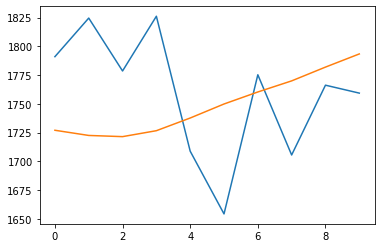

In [193]:
plt.plot(y_test[:10])
plt.plot(predictions[:10])

## predicting future trend

In [221]:
data=test_data[20-day:20, 0]

In [222]:
data.shape

(20,)

In [223]:
pred=model.predict(np.reshape(data,(1,X_test.shape[1], 1)))

In [230]:

y_test=dataset[2500:]
predictions=[]
data=test_data[20-day:20, 0]
pred=model.predict(np.reshape(data,(1,X_test.shape[1], 1)))
predictions.append(pred)
for i in range(day+1,len(test_data)):
    data=test_data[i-day:i-1, 0]
    data=np.append(data,predictions[i-(day+1)])
    pred=model.predict(np.reshape(data,(1,X_test.shape[1], 1)))
    predictions.append(pred)


In [233]:
y_test.shape

(450,)

In [241]:
pred=sc.inverse_transform(np.array(predictions).reshape(-1,1))

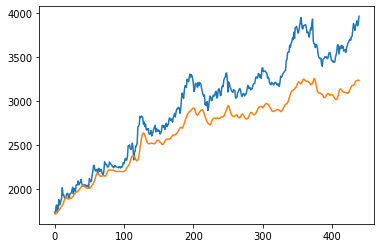

In [243]:
plt.plot(y_test[10:])
plt.plot(pred)